In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

From GoDataDriven Advanced Data Science with Python course

# Socioeconomic Country Clustering

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Data preparation

For each country, the following attributes are available: 
* country: name of the country
* child_mort: Deaths of children under 5 years of age per 1000 live births
* exports: Exports of goods and services.* 
* health: Total health spending.* 
* imports: Imports of goods and services.*  
* income: Net income per person
* Inflation: The measurement of annual growth rate of the total GDP. 
* life_expec: The average number of years a new born child would live.
* total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


\* _Given as percentage of the Total GDP_

In [4]:
data = pd.DataFrame(pd.read_csv('data/country-data.csv'))
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
X = data.drop(['country'], axis=1)
y = data['country']

In [6]:
X.shape

(167, 9)

The data is preprocessed. There were no missing values.

*** Questions *** 
- How many features do we have? --> 9 features
- Do we have any categorical variables? Would that pose a problem for k-means? --> The target variable (y) is categorical, but that is not problematic.
- What does _y_ mean in this case? --> y can be used as a label in the end to determine which countries belong to which cluster.


###  Exercise 1
The ranges vary between the different features. Scale your data! 

In [7]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Clusterability assessment

###  Exercise 2 
Our data has been scaled. But we're not sure if this problem is appropriate for clustering! Assess the clusterability of the data. 

In [23]:
from pyclustertend import hopkins

hopkins(X_scaled, 150)

0.14291257255834242

*** Question *** Would you conclude the data is clusterable based on the Hopkins statistic?

--> A score around 0.5 expresses no clusterability and a score tending to 0 express a high cluster tendency. With a score of < 0.15, the data is clusterable, we can continue.

## Number of clusters

The downside of k-means is that it requires you to define in advance how many clusters there are expected to be in the data. We are going to use the Elbow method to get a first indication of what an appropriate number of clusters would be. 

###  Exercise 3
Implement Elbow method here. 

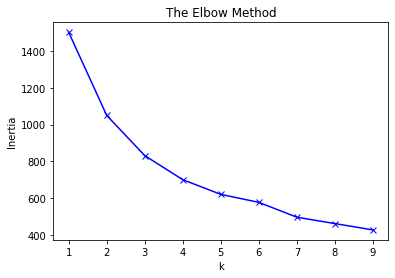

In [25]:
from sklearn.cluster import KMeans

K = range(1, 10)
score = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    score.append(kmeans.inertia_)
    
plt.plot(K, score, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia');

*** Question *** 
Does the Elbow method give a clear answer? What would you say possible choices are? 

--> The elbow method does not give a very clear answer. The possible choices are probably 4,5,7.

### Exercise 4

Next up is the Silhouette score. Implement silhouette score here. 

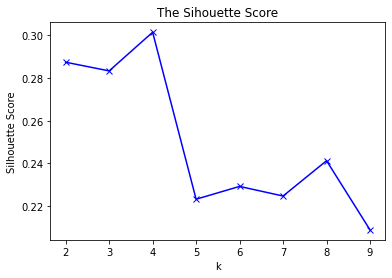

In [27]:
from sklearn.metrics import silhouette_score

K = range(2, 10)
score = []
for k in K: 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels, metric='euclidean')
    score.append(sil_score)
    
plt.plot(K, score, 'bx-')
plt.title('The Sihouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

*** Question *** What is your definite answer to the number of clusters appropriate for this data problem? 

--> 4 clusters

### Exercise 5
You have prepared your data and scaled it, and determined the number of clusters to use. Let's get ready to use k-means! Implement k-means here. 

In [35]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

### Exercise 6

K-means is pretty sensitive to initialisation. To ensure you have not become stuck in a local minima, you can run K-Means multiple times and choose the centroid for which the cost function (sum of squared distances of samples to their closest cluster center) is the lowest. In sklearn, you can access this value with the `.inertia_` attribute of your estimator. 

In [144]:
kmeans_4k = KMeans(n_clusters=4, n_init=100)
kmeans_4k.fit(X_scaled)
print(kmeans_4k.inertia_, set(kmeans_4k.labels_))

700.3229986404373 {0, 1, 2, 3}


## Analyse result

Let's convert our results to a pandas dataframe for easy data wrangling. Let's see how many points were assigned to each cluster.

In [148]:
labels_4k = pd.DataFrame(kmeans_4k.labels_, columns = ['labels_4k'])
labels_4k.value_counts() 

labels_4k
2            87
0            47
3            30
1             3
dtype: int64

Hmmmh, there is something interesting going on here, wouldn't you say? Based on the number of countries assigned to each cluster, do you still think the previous choice of number of clusters based on the Elbow method and the Silhouette score was the right choice? Or is there a different value you would like to try out now? 

### Exercise 7
Retry k-means with a different number of clusters. 

In [154]:
kmeans_3k = KMeans(n_clusters=3, n_init=100)
kmeans_3k.fit(X_scaled)
print(kmeans_3k.inertia_, set(kmeans_3k.labels_))

831.424435208687 {0, 1, 2}


In [155]:
labels = pd.DataFrame(kmeans_3k.labels_, columns = ['labels'])
labels.value_counts() 

labels
2         84
1         47
0         36
dtype: int64

This seems more like it! As there is no ground truth to compare our labels against, we cannot simply verify that out clustering was done correctly. However, we can investigate our features for the various labels and see if we can find some differentiating factors.

In [156]:
data_kmeans = pd.concat([data.copy(), labels, labels_4k], axis=1)
data_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,labels_4k
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,2,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,3
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,3
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,2,2


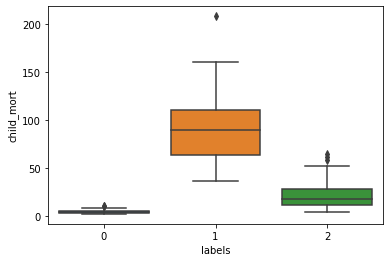

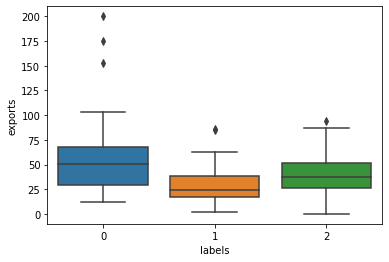

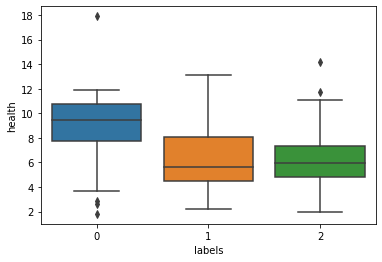

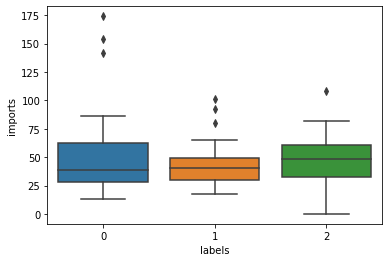

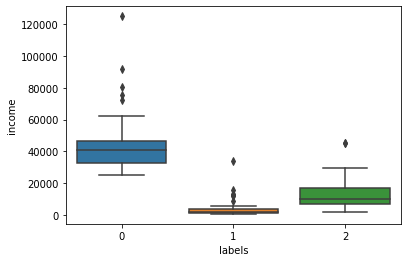

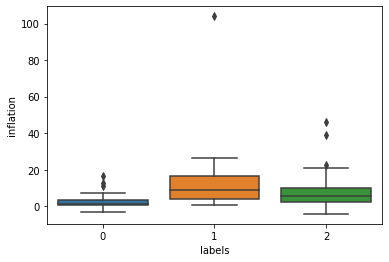

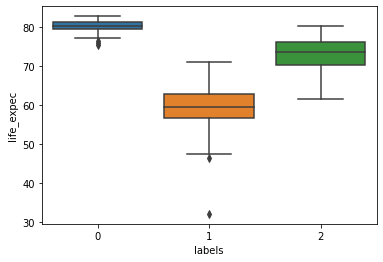

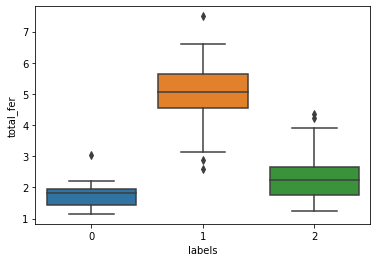

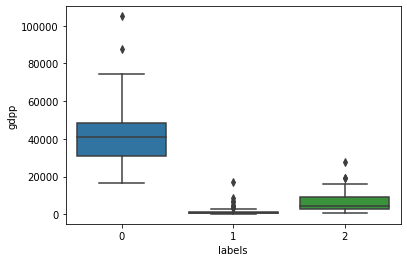

In [157]:
columns = data_kmeans.drop(['country', 'labels', 'labels_4k'], axis=1).columns

for i, column in enumerate(columns): 
    plt.figure()
    sns.boxplot(x='labels', y=column, data=data_kmeans)

*** Questions ***
- For which features do there seem to be notable differences between the clusters? --> child mortality, income, life expectancy, total_fer, gdpp
- For which features do the differences seem **not** that notable? --> export, health (slight difference), import, inflation
- How would you characterise the different labels in terms of their features? --> (0) countries to focus on most, (2) countries in between, (1) countries to focus on least

### Conclusion 

What clusters have you found in the data and how would you characterise these clusters? Explore the data with their corresponding labels. Are these findings according to your own expectations? 

In [158]:
for label in range(3):
    df_label = data_kmeans.loc[lambda data_kmeans: data_kmeans['labels'] == label]
    countries = ", ".join(df_label["country"].values)
    print(f"--Cluster {label}-- \n Countries: {countries} \n\n")

--Cluster 0-- 
 Countries: Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus, Czech Republic, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg, Malta, Netherlands, New Zealand, Norway, Portugal, Qatar, Singapore, Slovak Republic, Slovenia, South Korea, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States 


--Cluster 1-- 
 Countries: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia 


--Cluster 2-- 
 Countries: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, 

In [165]:
data_kmeans.drop("labels_4k", axis=1).groupby("labels").mean().round(2).sort_values("income")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
1,92.96,29.15,6.39,42.32,3942.40,12.02,59.19,5.01,1922.38
2,21.93,40.24,6.20,47.47,12305.60,7.60,72.81,2.31,6486.45
0,5.00,58.74,8.81,51.49,45672.22,2.67,80.13,1.75,42494.44


In [166]:
data_kmeans.drop("labels_4k", axis=1).groupby("labels").median().round(2).sort_values("income")

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
1,90.20,23.80,5.66,40.30,1870.0,8.92,59.50,5.06,897.0
2,18.35,37.30,5.93,48.65,10180.0,5.80,73.60,2.24,4670.0
0,4.20,50.35,9.44,39.05,40550.0,1.19,80.35,1.82,41200.0


### Bonus Exercise
Investigate for what countries the clustering went awry on the first try. What is special about these countries that they were assigned to different clusters? 

--> The three coutrnies in that cluster have very distinctive imports and exports values. 

In [169]:
data_kmeans.loc[lambda data_kmeans: data_kmeans['labels_4k'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,labels_4k
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,0,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,0,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,0,1


In [174]:
data_kmeans.groupby("labels_4k").mean().round(2).sort_values("income")[["imports", "exports"]]

,imports,exports
labels_4k,,
0,42.32,29.15
2,48.04,41.29
3,39.74,45.83
1,156.67,176.00


In [175]:
data_kmeans.groupby("labels_4k").median().round(2).sort_values("income")[["imports", "exports"]]

,imports,exports
labels_4k,,
0,40.3,23.80
2,49.2,37.70
3,35.0,44.25
1,154.0,175.00


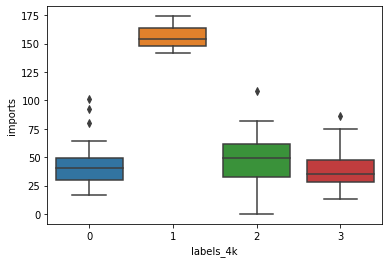

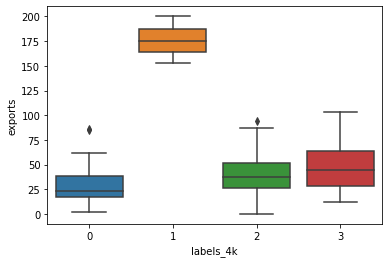

In [176]:
columns = data_kmeans[["imports", "exports"]].columns

for i, column in enumerate(columns): 
    plt.figure()
    sns.boxplot(x='labels_4k', y=column, data=data_kmeans)